
# Ambulance Object Detection using Detecto!!!
** 18 training images and 5 test images **


In [1]:
from os import listdir
location='/content/drive/MyDrive/train_images'
listdir(location)

['1.jpg',
 '2.jpg',
 '3.jpeg',
 '4.jpg',
 '5.jpg',
 '7.jpg',
 '8.jpg',
 '11.jpg',
 '12.jpg',
 '13.jpg',
 '18.jpg',
 '19.jpg',
 '20.jpg',
 '21.jpg',
 '17.png',
 '6.jpg',
 '14.jpg',
 '16.jpg',
 'classes.txt',
 '1.xml',
 '2.xml',
 '3.xml',
 '4.xml',
 '5.xml',
 '6.xml',
 '7.xml',
 '8.xml',
 '11.xml',
 '12.xml',
 '13.xml',
 '14.xml',
 '16.xml',
 '17.xml',
 '18.xml',
 '19.xml',
 '20.xml',
 '21.xml']

In [2]:
!pip install detecto

In [3]:
import matplotlib.pyplot as plt
from detecto.utils import read_image

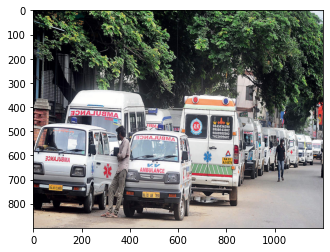

In [4]:
#Displaying one sample image 
base_path="/content/drive/MyDrive/train_images/"
sample="13.jpg"
image=read_image(base_path+sample)
plt.imshow(image)
plt.show()

In [5]:
from detecto.core import Dataset
dataset=Dataset(base_path)

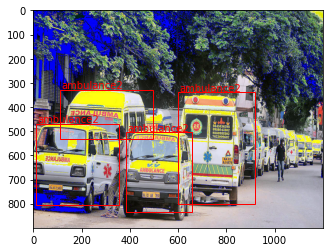

In [6]:
#Locating the objects
from detecto.visualize import show_labeled_image

image,targets=dataset[10]
show_labeled_image(image,targets['boxes'],targets['labels'])

In [7]:
##Initialized a model to detect our custom objects and then trained it
from detecto import core, utils, visualize

dataset = core.Dataset('/content/drive/MyDrive/train_images/')
model = core.Model(['ambulance1', 'ambulance2', 'ambulance3'])

model.fit(dataset)

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


  0%|          | 0.00/160M [00:00<?, ?B/s]

Epoch 1 of 10
Begin iterating over training dataset


  0%|          | 0/18 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
100%|██████████| 18/18 [00:16<00:00,  1.07it/s]


Epoch 2 of 10
Begin iterating over training dataset


100%|██████████| 18/18 [00:12<00:00,  1.39it/s]


Epoch 3 of 10
Begin iterating over training dataset


100%|██████████| 18/18 [00:12<00:00,  1.39it/s]


Epoch 4 of 10
Begin iterating over training dataset


100%|██████████| 18/18 [00:13<00:00,  1.38it/s]


Epoch 5 of 10
Begin iterating over training dataset


100%|██████████| 18/18 [00:13<00:00,  1.37it/s]


Epoch 6 of 10
Begin iterating over training dataset


100%|██████████| 18/18 [00:13<00:00,  1.36it/s]


Epoch 7 of 10
Begin iterating over training dataset


100%|██████████| 18/18 [00:13<00:00,  1.37it/s]


Epoch 8 of 10
Begin iterating over training dataset


100%|██████████| 18/18 [00:13<00:00,  1.36it/s]


Epoch 9 of 10
Begin iterating over training dataset


100%|██████████| 18/18 [00:13<00:00,  1.36it/s]


Epoch 10 of 10
Begin iterating over training dataset


100%|██████████| 18/18 [00:13<00:00,  1.36it/s]


In [21]:
image = utils.read_image('/content/drive/MyDrive/train_images/12.jpg')
predictions = model.predict(image)



In [22]:
labels, boxes, scores = predictions
print(labels) 
print(boxes)
print(scores)

['ambulance2', 'ambulance2', 'ambulance2', 'ambulance3', 'ambulance2', 'ambulance3', 'ambulance2', 'ambulance2', 'ambulance2', 'ambulance1', 'ambulance2', 'ambulance2', 'ambulance3', 'ambulance2', 'ambulance1', 'ambulance3', 'ambulance1', 'ambulance2', 'ambulance2', 'ambulance3', 'ambulance1', 'ambulance2', 'ambulance2', 'ambulance1', 'ambulance2', 'ambulance3', 'ambulance2', 'ambulance1', 'ambulance1', 'ambulance1', 'ambulance2']
tensor([[6.0174e+02, 3.5644e+02, 9.1196e+02, 5.4970e+02],
        [3.4212e+01, 1.0910e+02, 6.7964e+02, 5.8582e+02],
        [1.4820e+02, 2.2055e+02, 5.7859e+02, 5.2017e+02],
        [3.2994e+01, 1.9838e+02, 6.0555e+02, 5.2216e+02],
        [5.8320e+02, 1.9402e+02, 9.7562e+02, 7.3885e+02],
        [5.8450e+02, 3.0423e+02, 9.4087e+02, 5.9061e+02],
        [5.8331e+02, 2.9927e+02, 8.7446e+02, 6.4656e+02],
        [6.6264e+02, 2.6092e+02, 9.2957e+02, 5.9848e+02],
        [0.0000e+00, 2.5109e+02, 5.3511e+02, 6.1629e+02],
        [0.0000e+00, 2.1925e+02, 5.6928e+02

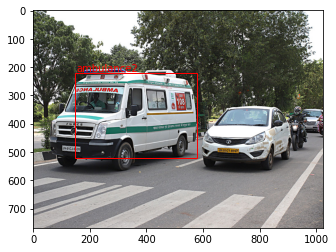

In [25]:
##Model prediction
visualize.show_labeled_image(image, boxes[2], labels[2])

In [27]:
#Image Augmentation
from torchvision import transforms

augmentations = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomHorizontalFlip(0.5),
    transforms.ColorJitter(saturation=0.5),
    transforms.ToTensor(),
    utils.normalize_transform(),
])

dataset = core.Dataset('/content/drive/MyDrive/train_images/', transform=augmentations)

loader = core.DataLoader(dataset, batch_size=2, shuffle=True)

Epoch 1 of 10
Begin iterating over training dataset


100%|██████████| 9/9 [00:13<00:00,  1.47s/it]


Begin iterating over validation dataset


100%|██████████| 5/5 [00:04<00:00,  1.18it/s]


Loss: 0.41146048307418825
Epoch 2 of 10
Begin iterating over training dataset


100%|██████████| 9/9 [00:13<00:00,  1.48s/it]


Begin iterating over validation dataset


100%|██████████| 5/5 [00:02<00:00,  1.85it/s]


Loss: 0.41558443903923037
Epoch 3 of 10
Begin iterating over training dataset


100%|██████████| 9/9 [00:13<00:00,  1.50s/it]


Begin iterating over validation dataset


100%|██████████| 5/5 [00:02<00:00,  1.99it/s]


Loss: 0.3951431423425674
Epoch 4 of 10
Begin iterating over training dataset


100%|██████████| 9/9 [00:13<00:00,  1.46s/it]


Begin iterating over validation dataset


100%|██████████| 5/5 [00:02<00:00,  1.87it/s]


Loss: 0.3804029256105423
Epoch 5 of 10
Begin iterating over training dataset


100%|██████████| 9/9 [00:13<00:00,  1.48s/it]


Begin iterating over validation dataset


100%|██████████| 5/5 [00:02<00:00,  2.03it/s]


Loss: 0.376534977555275
Epoch 6 of 10
Begin iterating over training dataset


100%|██████████| 9/9 [00:13<00:00,  1.45s/it]


Begin iterating over validation dataset


100%|██████████| 5/5 [00:02<00:00,  2.03it/s]


Loss: 0.3895475178956985
Epoch 7 of 10
Begin iterating over training dataset


100%|██████████| 9/9 [00:12<00:00,  1.42s/it]


Begin iterating over validation dataset


100%|██████████| 5/5 [00:02<00:00,  2.02it/s]


Loss: 0.3887829065322876
Epoch 8 of 10
Begin iterating over training dataset


100%|██████████| 9/9 [00:13<00:00,  1.47s/it]


Begin iterating over validation dataset


100%|██████████| 5/5 [00:02<00:00,  2.09it/s]


Loss: 0.3911434978246689
Epoch 9 of 10
Begin iterating over training dataset


100%|██████████| 9/9 [00:13<00:00,  1.45s/it]


Begin iterating over validation dataset


100%|██████████| 5/5 [00:02<00:00,  2.05it/s]


Loss: 0.39162886142730713
Epoch 10 of 10
Begin iterating over training dataset


100%|██████████| 9/9 [00:13<00:00,  1.49s/it]


Begin iterating over validation dataset


100%|██████████| 5/5 [00:02<00:00,  1.98it/s]

Loss: 0.3899942010641098


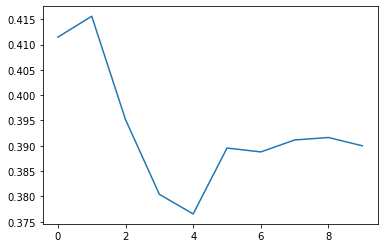

In [28]:

import matplotlib.pyplot as plt

val_dataset = core.Dataset('/content/drive/MyDrive/test_images/')

losses = model.fit(loader, val_dataset, epochs=10, learning_rate=0.001, 
                   lr_step_size=5, verbose=True)
                   
plt.plot(losses)
plt.show()

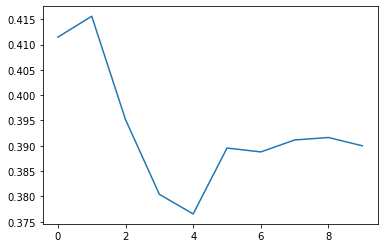

In [30]:
##Average loss and maAP graph of the training
plt.plot(losses)
plt.show()